In [1]:
import time

import torch
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt
import random
from torchsummary import summary

import os

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# compute the current classification accuracy
def compute_acc(preds, labels):
    correct = 0
    preds_ = preds.data.max(1)[1]
    correct = preds_.eq(labels.data).cpu().sum()
    acc = float(correct) / float(len(labels.data)) * 100.0
    return acc

class Generator_128(nn.Module):
    def __init__(self):
        super(Generator_128, self).__init__()
        self.fc1 = nn.Linear(110, 384)
        
        self.transConv1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=384, out_channels=192, kernel_size=4, stride=1,padding=0,bias=False),
            nn.BatchNorm2d(192),
            nn.ReLU(True)
        )
        self.transConv2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=192, out_channels=96, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(96),
            nn.ReLU(True)
        )
        self.transConv3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=96, out_channels=48, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU(True)
        )
        self.transConv4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=48, out_channels=24, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(24),
            nn.ReLU(True)
        )
        self.transConv5 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=24, out_channels=12, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(12),
            nn.ReLU(True)
        )
        self.transConv6 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=12, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
            nn.Tanh()
        )
#         self.apply(weights_init)
        
    def forward(self, x):
        x = x.view(-1, 110)
        fc1 = self.fc1(x)
        fc1 = fc1.view(-1, 384, 1, 1)
        transconv1 = self.transConv1(fc1)
        transconv2 = self.transConv2(transconv1)
        transconv3 = self.transConv3(transconv2)
        transconv4 = self.transConv4(transconv3)
        transconv5 = self.transConv5(transconv4)
        transconv6 = self.transConv6(transconv5)
        return transconv6
    
class Generator_64(nn.Module):
    def __init__(self):
        super(Generator_64, self).__init__()
        self.fc1 = nn.Linear(110, 384)
        
        self.transConv1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=384, out_channels=192, kernel_size=4, stride=1,padding=0,bias=False),
            nn.BatchNorm2d(192),
            nn.ReLU(True)
        )
        self.transConv2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=192, out_channels=96, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(96),
            nn.ReLU(True)
        )
        self.transConv3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=96, out_channels=48, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU(True)
        )
        self.transConv4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=48, out_channels=24, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(24),
            nn.ReLU(True)
        )
        self.transConv5 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=24, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
            nn.Tanh()
        )
#         self.transConv6 = nn.Sequential(
#             nn.ConvTranspose2d(in_channels=12, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
#             nn.Tanh()
#         )
#         self.apply(weights_init)
        
    def forward(self, x):
        x = x.view(-1, 110)
        fc1 = self.fc1(x)
        fc1 = fc1.view(-1, 384, 1, 1)
        transconv1 = self.transConv1(fc1)
        transconv2 = self.transConv2(transconv1)
        transconv3 = self.transConv3(transconv2)
        transconv4 = self.transConv4(transconv3)
        transconv5 = self.transConv5(transconv4)
        return transconv5

class Generator_32(nn.Module):
    def __init__(self):
        super(Generator_32, self).__init__()
        self.fc1 = nn.Linear(110, 384)
        
        self.transConv1 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=384, out_channels=192, kernel_size=4, stride=1,padding=0,bias=False),
            nn.BatchNorm2d(192),
            nn.ReLU(True)
        )
        self.transConv2 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=192, out_channels=96, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(96),
            nn.ReLU(True)
        )
        self.transConv3 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=96, out_channels=48, kernel_size=4, stride=2,padding=1,bias=False),
            nn.BatchNorm2d(48),
            nn.ReLU(True)
        )
        self.transConv4 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=48, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
            nn.Tanh()
        )
#         self.transConv5 = nn.Sequential(
#             nn.ConvTranspose2d(in_channels=24, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
#             nn.Tanh()
#         )
#         self.transConv6 = nn.Sequential(
#             nn.ConvTranspose2d(in_channels=12, out_channels=3, kernel_size=4, stride=2,padding=1,bias=False),
#             nn.Tanh()
#         )
#         self.apply(weights_init)
        
    def forward(self, x):
        x = x.view(-1, 110)
        fc1 = self.fc1(x)
        fc1 = fc1.view(-1, 384, 1, 1)
        transconv1 = self.transConv1(fc1)
        transconv2 = self.transConv2(transconv1)
        transconv3 = self.transConv3(transconv2)
        transconv4 = self.transConv4(transconv3)
        return transconv4

class Discriminator(nn.Module):
    def __init__(self, input_size, num_labels):
        super(Discriminator, self).__init__()
        self.Conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.Conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.Conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.Conv4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.Conv5 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.Conv6 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, True),
            nn.Dropout(p=0.5, inplace=False)
        )
        self.fc_aux = nn.Linear(in_features=512*int(input_size / 8)*int(input_size / 8), out_features=num_labels)
        self.fc = nn.Linear(512*int(input_size / 8)*int(input_size / 8), 1)
        self._softmax = nn.Softmax()
        self._sigmoid = nn.Sigmoid()
#         self.apply(weights_init)
    def forward(self, x):
        x = self.Conv1(x)
        x = self.Conv2(x)
        x = self.Conv3(x)
        x = self.Conv4(x)
        x = self.Conv5(x)
        x = self.Conv6(x)
        x = x.view(x.size(0), -1)
        aux = self._softmax(self.fc_aux(x))
        fc = self._sigmoid(self.fc(x)).view(-1, 1).squeeze(1)
        return fc, aux
        


In [4]:
batch_size = 100
input_size = 110
num_classes = 10
image_size = 32
EPOCH = 500
noise_sd = 1.0
LR = 0.0002

evaluation = True

In [5]:
# model = Discriminator(input_size = image_size, num_labels=10).to(device)
# summary(model, input_size=(3,image_size,image_size))

In [6]:
# model = Generator_32().to(device)
# summary(model, input_size=(1, 110))

In [7]:
random.seed(123)
torch.manual_seed(123)

transform_train = transforms.Compose([
        transforms.Resize(image_size),
#         transforms.RandomCrop(image_size, padding=4),
#         transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

    ])

transform_test = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

])
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=16)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# netD = _netD_CIFAR10(num_labels=10).to(device)
# netG = _netG_CIFAR10().to(device)
if evaluation is True:
    netG = Generator_32().to(device)
    save_folder = "./modelv0/"
    image_folder = "./imagev0/"
    log_file = os.path.join(save_folder, 'log_file.txt')
    print('train for final model')
else:
    if image_size == 32:
        netG = Generator_32().to(device)
        root = './size32_lr%.4f' % LR
        modelname = 'modelsd%.1f' % noise_sd
        imagename = 'imagesd%.1f' % noise_sd
        image_folder = os.path.join(root, imagename)
        save_folder = os.path.join(root, modelname)
        log_file = os.path.join(root, modelname, 'log_file.txt')
#     if LR == 0.0002:
#         netG = Generator_32().to(device)
#         root = './size32'
#         image_folder = "./size32/image/"
#         save_folder = "./size32/model/"
#         log_file = './size32/model/log_file.txt'
#     elif LR == 0.0001:
#         netG = Generator_32().to(device)
#         image_folder = "./size32_lr0.0001/image/"
#         save_folder = "./size32_lr0.0001/model/"
#         log_file = './size32_lr0.0001/model/log_file.txt'
    
# if image_size == 64:
#     netG = Generator_64().to(device)
#     image_folder = "./size64/image/"
#     save_folder = "./size64/model/"
#     log_file = './size64/model/log_file.txt'
# if image_size == 128:
#     netG = Generator_128().to(device)
#     image_folder = "./size128/image/"
#     save_folder = "./size128/model/"
#     log_file = './size128/model/log_file.txt'

netD = Discriminator(input_size = image_size, num_labels=10).to(device)
# netG = Generator_32().to(device)
netD.apply(weights_init)
netG.apply(weights_init)



_input = torch.FloatTensor(batch_size, 3, image_size, image_size).to(device)
noise = torch.FloatTensor(batch_size, 110, 1, 1).to(device)
eval_noise = torch.FloatTensor(batch_size, 110, 1, 1).normal_(0, noise_sd).to(device)
dis_label = torch.FloatTensor(batch_size).to(device)
aux_label = torch.LongTensor(batch_size).to(device)
real_label = 1
fake_label = 0

# noise for evaluation
eval_noise_ = np.random.normal(0, 1, (batch_size, 110))
eval_label = np.random.randint(0, num_classes, batch_size)
eval_onehot = np.zeros((batch_size, num_classes))
eval_onehot[np.arange(batch_size), eval_label] = 1
eval_noise_[np.arange(batch_size), :num_classes] = eval_onehot[np.arange(batch_size)]
eval_noise_ = (torch.from_numpy(eval_noise_))
eval_noise.data.copy_(eval_noise_.view(batch_size, 110, 1, 1))

dis_criterion = nn.BCELoss()
aux_criterion = nn.NLLLoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

print('Learning rate: %.4f, noise sd: %.1f' %(LR, noise_sd))

Files already downloaded and verified
Files already downloaded and verified
train for final model
Learning rate: 0.0002, noise sd: 1.0


In [8]:
avg_loss_D = 0.0
avg_loss_G = 0.0
avg_loss_A = 0.0
loss_D, loss_G, loss_A = [], [], []


f = open(log_file, 'w')
for epoch in range(EPOCH):
    for i, data in enumerate(trainloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu, label = data
        batch_size = real_cpu.size(0)
        real_cpu = real_cpu.to(device)
        label = label.to(device)
        _input.data.resize_as_(real_cpu).copy_(real_cpu)
        dis_label.data.resize_(batch_size).fill_(real_label)
        aux_label.data.resize_(batch_size).copy_(label)
        dis_output, aux_output = netD(_input)

        dis_errD_real = dis_criterion(dis_output, dis_label)
        aux_errD_real = aux_criterion(aux_output, aux_label)
        errD_real = dis_errD_real + aux_errD_real
        errD_real.backward()
        D_x = dis_output.data.mean()

        # compute the current classification accuracy
        accuracy = compute_acc(aux_output, aux_label)

        # train with fake
        noise.data.resize_(batch_size, 110, 1, 1).normal_(0, noise_sd)
        label = np.random.randint(0, num_classes, batch_size)
        noise_ = np.random.normal(0, noise_sd, (batch_size, 110))
        class_onehot = np.zeros((batch_size, num_classes))
        class_onehot[np.arange(batch_size), label] = 1
        noise_[np.arange(batch_size), :num_classes] = class_onehot[np.arange(batch_size)]
        noise_ = (torch.from_numpy(noise_))
        noise.data.copy_(noise_.view(batch_size, 110, 1, 1))
        aux_label.data.resize_(batch_size).copy_(torch.from_numpy(label))

        fake = netG(noise)
        dis_label.data.fill_(fake_label)
        dis_output, aux_output = netD(fake.detach())
        dis_errD_fake = dis_criterion(dis_output, dis_label)
        aux_errD_fake = aux_criterion(aux_output, aux_label)
        errD_fake = dis_errD_fake + aux_errD_fake
        errD_fake.backward()
        D_G_z1 = dis_output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        dis_label.data.fill_(real_label)  # fake labels are real for generator cost
        dis_output, aux_output = netD(fake)
        dis_errG = dis_criterion(dis_output, dis_label)
        aux_errG = aux_criterion(aux_output, aux_label)
        errG = dis_errG + aux_errG
        errG.backward()
        D_G_z2 = dis_output.data.mean()
        optimizerG.step()
        
        # compute the average loss
        curr_iter = epoch * len(trainloader) + i
        all_loss_G = avg_loss_G * curr_iter
        all_loss_D = avg_loss_D * curr_iter
        all_loss_A = avg_loss_A * curr_iter
#         all_loss_G += errG.data[0]
#         all_loss_D += errD.data[0]
        all_loss_G += errG.item()
        all_loss_D += errD.item()
        all_loss_A += accuracy
        avg_loss_G = all_loss_G / (curr_iter + 1)
        avg_loss_D = all_loss_D / (curr_iter + 1)
        avg_loss_A = all_loss_A / (curr_iter + 1)
        loss_A.append(avg_loss_A)
        loss_G.append(avg_loss_G)
        loss_D.append(avg_loss_D)

        f.write('[%d/%d][%d/%d] Loss_D: %.4f (%.4f) Loss_G: %.4f (%.4f) D(x): %.4f D(G(z)): %.4f / %.4f Acc: %.4f (%.4f) \n'
              % (epoch, EPOCH, i, len(trainloader),
                 errD.item(), avg_loss_D, errG.item(), avg_loss_G, D_x, D_G_z1, D_G_z2, accuracy, avg_loss_A))
        if epoch % 100 == 0:
            torchvision.utils.save_image(
                real_cpu, '%s/real_samples_%03d.png' % (image_folder, epoch), nrow=10)
        if i % 100 == 0:
#             print('Label for eval = {}'.format(eval_label))
            fake = netG(eval_noise)
            torchvision.utils.save_image(
                fake.data,
                '%s/fake_samples_epoch_%03d.png' % (image_folder, epoch), 
                nrow=10
            )
    # do checkpointing
    torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (save_folder, epoch))
    torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (save_folder, epoch))
f.close()

/home/jikai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:206: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


/home/jikai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/home/jikai/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


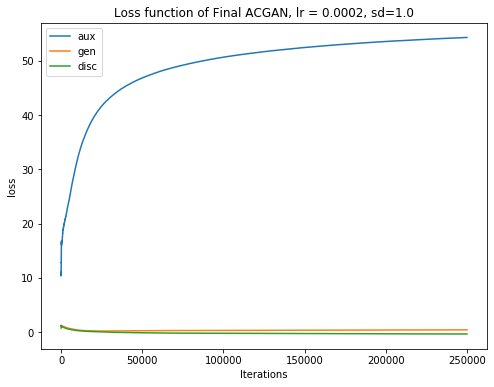

In [12]:
X = np.arange(len(loss_A))
plt.figure(figsize=(8,6))
plt.plot(X, loss_A, label = "aux")
plt.plot(X, loss_G, label = "gen")
plt.plot(X, loss_D, label = "disc")
plt.legend()
if evaluation is True:
    plt.title("Loss function of Final ACGAN, lr = %.4f, sd=%.1f" % (LR, noise_sd))
    plt.xlabel('Iterations')
    plt.ylabel('loss')
    plt.savefig('./plots/finalloss32_lr%.4f, sd=%.1f_v0.png' % (LR, noise_sd))
else:
    plt.title("Loss function of ACGAN, lr = %.4f, sd=%.1f" % (LR, noise_sd))
    plt.xlabel('Iterations')
    plt.ylabel('loss')
    plt.savefig('./plots/loss32_lr%.4f, sd=%.1f.png' % (LR, noise_sd))

In [19]:
def get_sample_images(genmod, l, num_classes, noise_sd, postfix):
    random.seed(123)
    torch.manual_seed(123)
    k = int(l * num_classes)
    noise = torch.FloatTensor(k, 110, 1, 1).to(device)
    label = np.concatenate([np.repeat([0], l), np.repeat([1], l), np.repeat([2], l), np.repeat([3], l), 
                            np.repeat([4], l), np.repeat([5], l), np.repeat([6], l), np.repeat([7], l), 
                            np.repeat([8], l), np.repeat([9], l)])
    noise_ = np.random.normal(0, noise_sd, (k, 110))
    class_onehot = np.zeros((k, num_classes))
    class_onehot[np.arange(k), label] = 1
    noise_[np.arange(k), :num_classes] = class_onehot[np.arange(k)]
    noise_ = (torch.from_numpy(noise_))
    noise.data.copy_(noise_.view(k, 110, 1, 1))
    fake = genmod(noise)
   
    torchvision.utils.save_image(
                fake.data,
                './test_image/example_%s.png' % postfix,
                nrow=l
            )

In [14]:
# model = Generator_32().to(device)
# model.load_state_dict(torch.load(os.path.join('./size32_lr0.0001/modelsd0.1', "netG_epoch_99.pth")))

In [12]:
# postfix = 'lr0.0001 sd0.1' 
# get_sample_images(genmod=model, l=4, num_classes=num_classes, noise_sd=noise_sd, postfix=postfix)

In [20]:
save_folder = "./model/"
model = Generator_32().to(device)
model.load_state_dict(torch.load(os.path.join(save_folder, "netG_epoch_999.pth")))

<All keys matched successfully>

In [21]:
epoch_num = [0, 299, 499, 799, 999]
model = Generator_32().to(device)
for epoch in epoch_num:
    mname = "netG_epoch_%d.pth" % epoch
    model.load_state_dict(torch.load(os.path.join(save_folder, mname)))
    postfix = 'final_epoch%d' % epoch
    get_sample_images(genmod=model, l=4, num_classes=num_classes, noise_sd=noise_sd, postfix=postfix)

In [16]:
if evaluation is True:
    postfix = 'final lr%.4f sd%.1f_v0' % (LR, noise_sd)
else:
    postfix = 'lr%.4f sd%.1f' % (LR, noise_sd)
get_sample_images(genmod=model, l=4, num_classes=num_classes, noise_sd=noise_sd, postfix=postfix)

In [16]:
classes

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')